## Gravitational orbits class

Solves for the orbits of two particles orbiting under gravitational attraction using Lagrange's equations.

In [1]:
%matplotlib inline

In [2]:
# call in needed packages
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
class GravitationalOrbits():
    """
    Uses Lagrange's equations for two particles orbiting under gravitational attraction.
    
    Parameters:
    ---------
    m1: float
    m2: float
    G: float
    
    Methods:
    -----------
    dy_dt(t, y)
        Returns RHS of differential equation in vector y given time t and corresponding y value.
    """
    
    def __init__ (self, m1=1., m2=1., G=1.):
        self.m1 = m1
        self.m2 = m2
        self.G = G
        
    def dz_dt(self, t, z):
        """
        Returns RHS of differential equation
        
        Parameters
        ----------
        t: float
            time
        z: float
            8-vector with
            z[0] = x1(t) and z[1] = x1_dot(t)
            z[2] = y1(t) and z[3] = y1_dot(t)
            z[4] = x2(t) and z[5] = x2_dot(t)
            z[6] = y2(t) and z[7] = y2_dot(t)
        """
        
        r_12 = np.sqrt((z[0] - z[4])**2 + (z[2] - z[6])**2)
        
        return [z[1], self.G * self.m2 * (z[4] - z[0]) / r_12**3, z[3], self.G * self.m2 * (z[6] - z[2]) / r_12**3, \
               z[5], -self.G * self.m1 * (z[4] - z[0]) / r_12**3, z[7], -self.G * self.m1 * (z[6]-z[2]) / r_12**3]
    
    def solve_ode(self, t_pts, z_0, abserr=1.e-8, relerr=1.e-8):
        """
        Solve ODE given initial conditions.
        """
        
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), z_0, t_eval=t_pts, method='RK23', atol=abserr, rtol=relerr)
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = solution.y
        
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make simple orbit plots

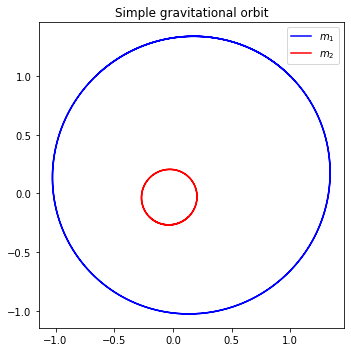

In [6]:
# Labels for axes
orbit_labels = (r'$x$', r'$y$')

# Common plotting time
t_start = 0
t_end = 10
delta_t = .01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

G = 1.
m1 = 1.
m2 = 5.

# Instantiate a set of orbits
o1 = GravitationalOrbits(m1, m2, G)


# initial conditions with C.O.M velocity zero
x1_0, x1_dot_0 = 1., -1.
y1_0, y1_dot_0 = 1., 1.
x2_0, x2_dot_0 = (-m1 / m2) * x1_0, -(m1 / m2) * x1_dot_0
y2_0, y2_dot_0 = (-m1 / m2) * y1_0, -(m1 / m2) * y1_dot_0

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = o1.solve_ode(t_pts, z_0)

# start plot
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x1, y1, color='blue', label=r'$m_1$')
ax.plot(x2, y2, color='red', label=r'$m_2$')
ax.set_title('Simple gravitational orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()

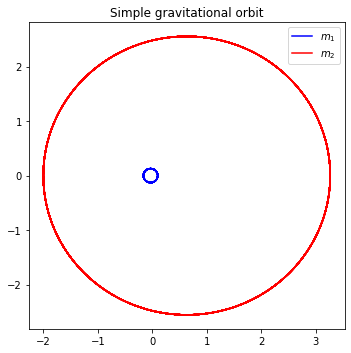

In [7]:
# Common plotting time
t_start = 0
t_end = 20
delta_t = .00001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

G = 20.
m1 = 20.
m2 = 1.

# Instantiate a set of orbits
o1 = GravitationalOrbits(m1, m2, G)


# initial conditions with C.O.M velocity zero
x1_0, x1_dot_0 = .1, 0.
y1_0, y1_dot_0 = 0, .75
x2_0, x2_dot_0 = (-m1 / m2) * x1_0, -(m1 / m2) * x1_dot_0
y2_0, y2_dot_0 = (-m1 / m2) * y1_0, -(m1 / m2) * y1_dot_0

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = o1.solve_ode(t_pts, z_0)

# start plot
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x1, y1, color='blue', label=r'$m_1$')
ax.plot(x2, y2, color='red', label=r'$m_2$')
ax.set_title('Simple gravitational orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()

This is reduced to the orbits considered in class.